# Lab 01: Property Permit

### Pre-processing data:
### Start with reading in the property_permits.csv and dropping columns with 80% null cells
The dimensions of the property_permits dataframe starts with (198900, 43) and ends with (198900,43) after performing dropna().


Before dropping columns with majority null cells: 
(198900, 43)
	Permit Number:  0
	Permit Type:  0
	Permit Type Definition:  0
	Permit Creation Date:  0
	Block:  0
	Lot:  0
	Street Number:  0
	Street Number Suffix:  196684
	Street Name:  0
	Street Suffix:  2768
	Unit:  169421
	Unit Suffix:  196939
	Description:  290
	Current Status:  0
	Current Status Date:  0
	Filed Date:  0
	Issued Date:  14940
	Completed Date:  101709
	First Construction Document Date:  14946
	Structural Notification:  191978
	Number of Existing Stories:  42784
	Number of Proposed Stories:  42868
	Voluntary Soft-Story Retrofit:  198865
	Fire Only Permit:  180073
	Permit Expiration Date:  51880
	Estimated Cost:  38066
	Revised Cost:  6066
	Existing Use:  41114
	Existing Units:  51538
	Proposed Use:  42439
	Proposed Units:  50911
	Plansets:  37309
	TIDF Compliance:  198898
	Existing Construction Type:  43366
	Existing Construction Type Description:  43366
	Proposed Construction Type:  43162
	Proposed Construction Typ

<AxesSubplot:>

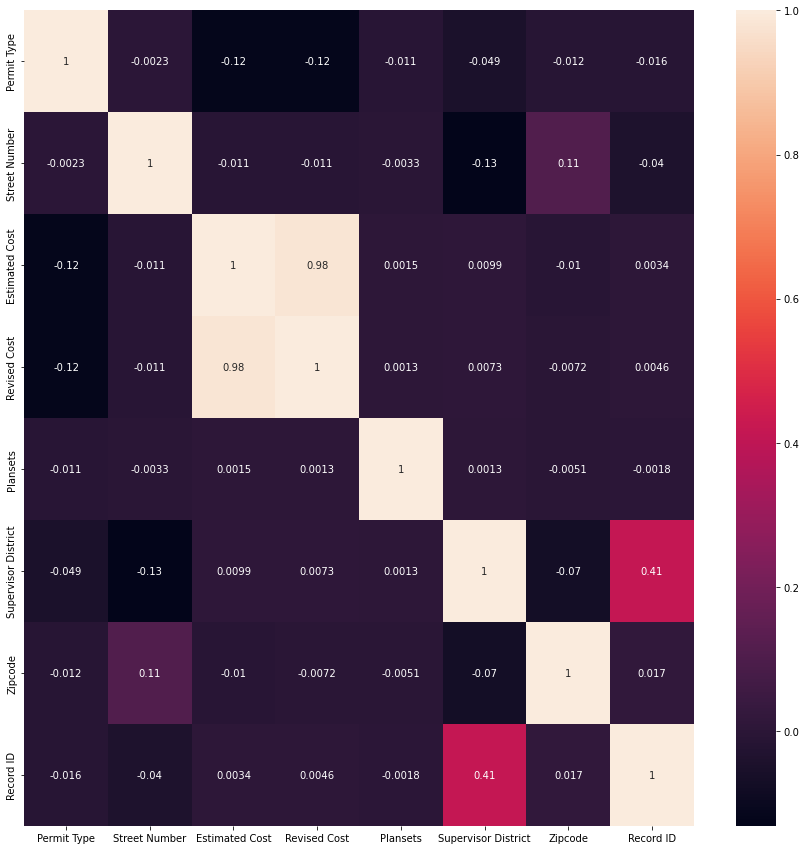

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

THRESHOLD = .8

df = pd.read_csv("property_permits.csv", low_memory = False)

df1 = df

print("Before dropping columns with majority null cells:")
print(df1.shape)

for col in df1.columns:
    print(f'\t{col}: ', df[col].isnull().sum())

df1 = df.dropna(thresh = (len(df.axes[0]) * THRESHOLD), axis = 'columns')

print("After dropping columns with majority null cells:")
print(df1.shape)

for col in df1.columns:
    print(f'\t{col}: ', df[col].isnull().sum())

In [72]:
df1

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Issued Date,First Construction Document Date,Estimated Cost,Revised Cost,Plansets,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,11/09/2015,11/09/2015,4000.0,4000.0,2.0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,08/03/2017,08/03/2017,1.0,500.0,2.0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,NaN,NaN,20000.0,NaN,2.0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,07/18/2017,07/18/2017,2000.0,2000.0,2.0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,12/01/2017,11/20/2017,100000.0,100000.0,2.0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,St,street space,...,12/05/2017,12/05/2017,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,St,fire alarm upgrade ref 201704123852,...,12/06/2017,12/06/2017,5000.0,5000.0,2.0,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,St,street space,...,12/06/2017,12/06/2017,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,St,street space permit,...,12/06/2017,12/06/2017,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1489608233656


### To perform exploratory data analysis that highlights attributes with strong correlation, I used the .corr() method in Pandas and used its outputs to create a heatmap and better visualize these correlations.
From the heatmap below, we can see that:
1. 'Estimated Cost' and 'Revised Cost' show a strong positive correlation of .98
2. 'Supervisor District' and 'Record ID' show a positive correlation of .41, but upon further examination of the dataset, the Record ID does not seem to create meaningful correlation with Supervisor District because it is most likely chronologically or pseudo-randomly created. However, by examining the total number of permits issued by each Supervisor District might give us more insight.
3. 'Permit Type' and 'Estimated Cost' show a negative correlation of -.12

<AxesSubplot:>

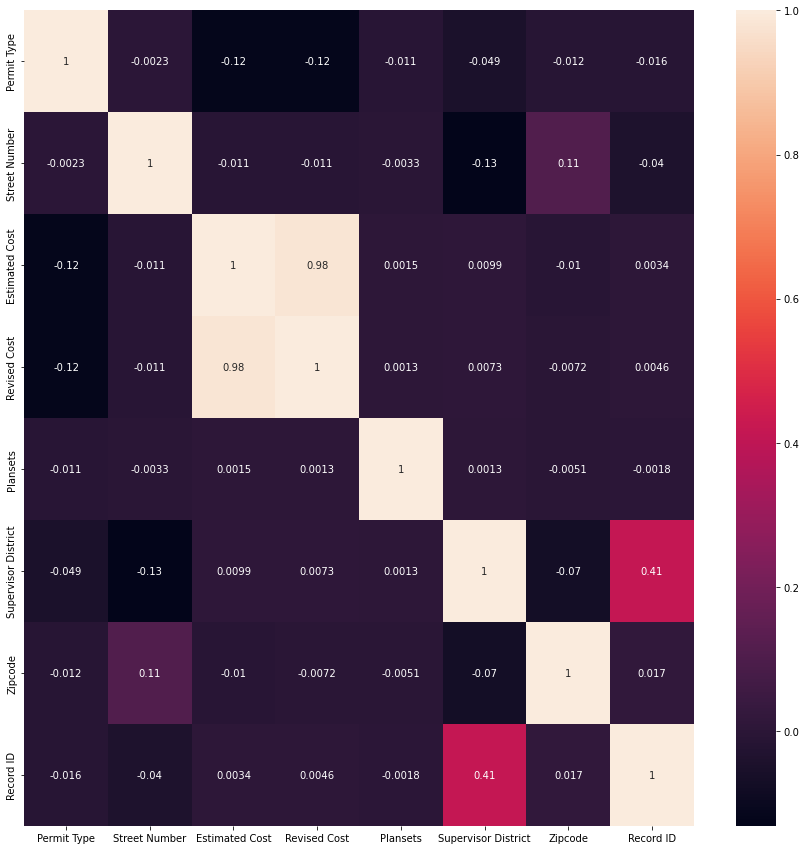

In [62]:
corr = df1.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True)

### Scatter Plot of Estimated Cost vs. Revised Cost
Estimated Cost and Revised Cost can be taken in as input, where the target can compute a more realistic cost of a permit using previous estimations.

Text(0.5, 1.0, 'Estimated Cost vs. Revised Cost')

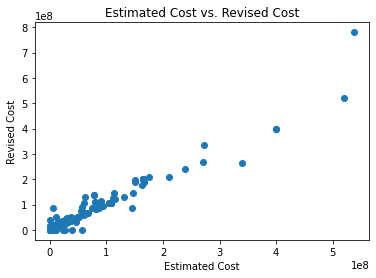

In [85]:
plt.scatter(df['Estimated Cost'], df['Revised Cost'])
plt.xlabel("Estimated Cost")
plt.ylabel("Revised Cost")
plt.title("Estimated Cost vs. Revised Cost")

### Bar graph of the Amount of Permits Issued by Each Supervisor District
The amount of permits issued per supervisor district, permit type, and project description can be further analysized and taken as inputs for the target of finding what kind of projects and permit types will have the most probable chance of getting a permit.

Text(0.5, 1.0, 'Amount of Permits Issued per Supervisor District')

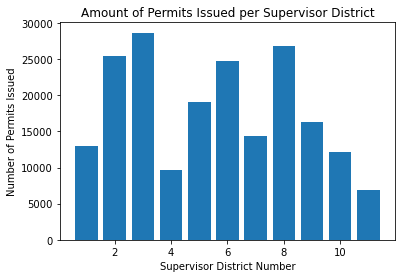

In [86]:
plt.bar(df1['Supervisor District'].value_counts().index, df['Supervisor District'].value_counts())
plt.xlabel("Supervisor District Number")
plt.ylabel("Number of Permits Issued")
plt.title("Amount of Permits Issued per Supervisor District")


### Scatter graph of the Estimated Cost of Each Permit Type
Scatter plot is chosen to display the outliers as well as how the cost of each permit type is distributed. From the graph below, we can deduce that Permit Type 1 has the largest variation and range in cost.
Estimated Cost and Permit Type can be taken as input where the target can show the possible range in how much the permit would cost.

Text(0.5, 1.0, 'Estimated Cost of Each Permit Type Available')

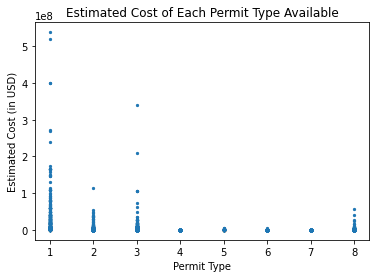

In [92]:
plt.scatter(df1['Permit Type'], df1['Estimated Cost'], s = 5)
plt.xlabel("Permit Type")
plt.ylabel("Estimated Cost (in USD)")
plt.title("Estimated Cost of Each Permit Type Available")

### Scatter graph of the Permit Type Issued by Each Supervisor District
This one is a less intuitive approach to do but useful nonetheless. From this graph, we can see that Supervisor District 4 and 8 has not issued permits for Permit Type 5 in the past.
Supervisor District and Permit Type are inputs for a target that can give recommendations on which supervisor district is more probable in issuing the type of permit that is desired.

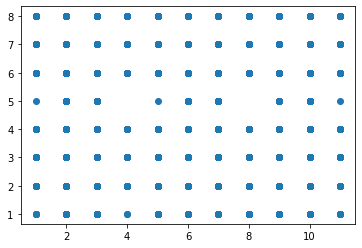

In [93]:
plt.scatter(df1['Supervisor District'], df1['Permit Type'])